Importing required libraries

In [1]:
import  pandas as pd
import  numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import  train_test_split
from sklearn.svm import SVC
from sklearn.metrics import  classification_report,accuracy_score

In [2]:
train=pd.read_csv("weather_classification_data.csv")

In [3]:
train

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


Exploring the data (EDA)

In [5]:
avg_temp=train["Temperature"].mean()
print(f"average temperature in this data set is: {round(avg_temp,2)}")

average temperature in this data set is: 19.13


In [6]:
#In Which Season We Have Max Humidity 
max_hum_sean=train.groupby("Season")["Humidity"].mean()
print(max_hum_sean.idxmax())

Winter


In [7]:
#average visibility over season
avg_vis=train.groupby("Season")["Visibility (km)"].mean()
print(avg_vis)

Season
Autumn    6.289000
Spring    6.242879
Summer    6.169743
Winter    4.419608
Name: Visibility (km), dtype: float64


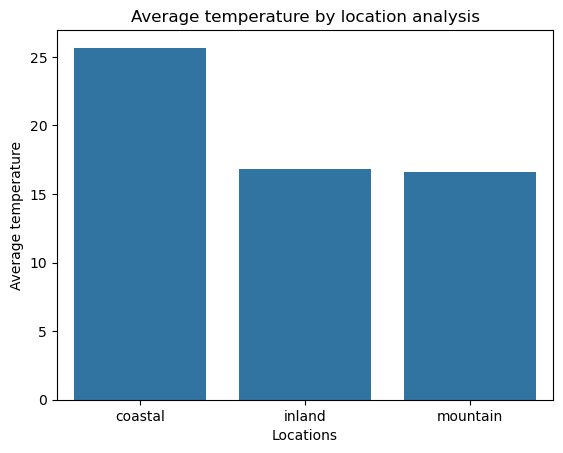

In [8]:
#temperature over location
temp_by_loc=train.groupby("Location")["Temperature"].mean().reset_index()
sns.barplot(data=temp_by_loc,x="Location",y="Temperature")
plt.title("Average temperature by location analysis")
plt.xlabel("Locations")
plt.ylabel("Average temperature")
plt.show()

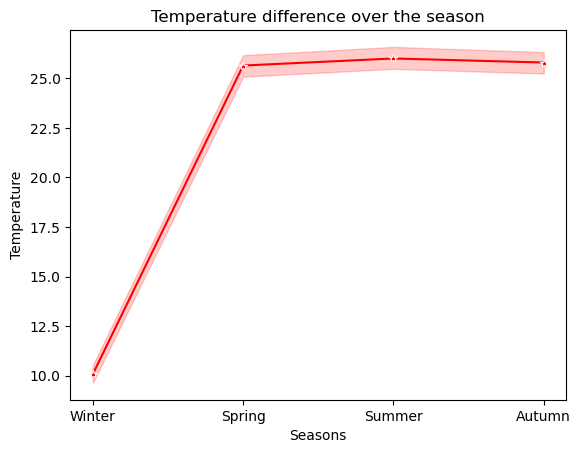

In [9]:
#temperature inceases over season
sns.lineplot(data=train,x="Season",y="Temperature",marker="*",color="red")
plt.title("Temperature difference over the season")
plt.xlabel("Seasons")
plt.ylabel("Temperature")
plt.show()

Feature Extraction 

In [10]:
#the data doesn't contain any null values in it 
train.isna().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [11]:
train["Cloud Cover"].unique()

array(['partly cloudy', 'clear', 'overcast', 'cloudy'], dtype=object)

In [12]:
train.loc[:,"Cloud Cover"]=train["Cloud Cover"].str.replace('partly cloudy','0')
train.loc[:,"Cloud Cover"]=train["Cloud Cover"].str.replace('clear','1')
train.loc[:,"Cloud Cover"]=train["Cloud Cover"].str.replace('overcast','2')
train.loc[:,"Cloud Cover"]=train["Cloud Cover"].str.replace('cloudy','3')

In [13]:
train["Season"].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [14]:
train.loc[:,"Season"]=train["Season"].str.replace('Winter','0')
train.loc[:,"Season"]=train["Season"].str.replace('Spring','1')
train.loc[:,"Season"]=train["Season"].str.replace('Summer','2')
train.loc[:,"Season"]=train["Season"].str.replace('Autumn','3')

In [15]:
train["Location"].unique()

array(['inland', 'mountain', 'coastal'], dtype=object)

In [16]:
train.loc[:,"Location"]=train["Location"].str.replace('inland','0')
train.loc[:,"Location"]=train["Location"].str.replace('mountain','1')
train.loc[:,"Location"]=train["Location"].str.replace('coastal','2')

In [17]:
train['Weather Type'].unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

In [18]:
#because we are using svm algorithm so we have to change or convert the output data also into the numeric format
train.loc[:,'Weather Type']=train['Weather Type'].str.replace('Rainy','0')
train.loc[:,'Weather Type']=train['Weather Type'].str.replace('Cloudy','1')
train.loc[:,'Weather Type']=train['Weather Type'].str.replace('Sunny','2')
train.loc[:,'Weather Type']=train['Weather Type'].str.replace('Snowy','3')

In [19]:
train

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,0,1010.82,2,0,3.5,0,0
1,39.0,96,8.5,71.0,0,1011.43,7,1,10.0,0,1
2,30.0,64,7.0,16.0,1,1018.72,5,1,5.5,1,2
3,38.0,83,1.5,82.0,1,1026.25,7,1,1.0,2,2
4,27.0,74,17.0,66.0,2,990.67,1,0,2.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,2,1003.15,1,2,1.0,1,0
13196,-1.0,76,3.5,23.0,3,1067.23,1,0,6.0,2,3
13197,30.0,77,5.5,28.0,2,1012.69,3,3,9.0,2,1
13198,3.0,76,10.0,94.0,2,984.27,0,0,2.0,0,3


Spliting the data columns into 2 parts input and output

In [20]:
train["Weather Type"].value_counts()

Weather Type
0    3300
1    3300
2    3300
3    3300
Name: count, dtype: int64

In [21]:
train.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

In [22]:
#for input
x=train[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location']]


#for output
y=train['Weather Type']

Train Test Spliting

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=77)

Model calling and training

In [24]:
#model calling

model=SVC()

In [25]:
#training the model on the data set
model.fit(x_train,y_train)

SVC()

Predicting the output

In [26]:
y_pred=model.predict(x_test)

In [27]:
#calculating  the accuracy of the built model
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       655
           1       0.88      0.76      0.81       688
           2       0.86      0.81      0.83       676
           3       0.88      0.94      0.90       621

    accuracy                           0.84      2640
   macro avg       0.85      0.84      0.84      2640
weighted avg       0.85      0.84      0.84      2640



In [28]:
#to get the best random state value we use the for loop for best accuracy as we done here below
l=[]
for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accu=accuracy_score(y_test,y_pred)
    l.append(accu)
    print(f'for the random state {i} the accuracy of the model is {accu}')

print(f'for the max accuracy is: {max(l)} for the random state {l.index(max(l))}')

for the random state 0 the accuracy of the model is 0.8371212121212122
for the random state 1 the accuracy of the model is 0.8318181818181818
for the random state 2 the accuracy of the model is 0.8261363636363637
for the random state 3 the accuracy of the model is 0.8299242424242425
for the random state 4 the accuracy of the model is 0.831060606060606
for the random state 5 the accuracy of the model is 0.8178030303030303
for the random state 6 the accuracy of the model is 0.8143939393939394
for the random state 7 the accuracy of the model is 0.8272727272727273
for the random state 8 the accuracy of the model is 0.8200757575757576
for the random state 9 the accuracy of the model is 0.8231060606060606
for the random state 10 the accuracy of the model is 0.8242424242424242
for the random state 11 the accuracy of the model is 0.8208333333333333
for the random state 12 the accuracy of the model is 0.828030303030303
for the random state 13 the accuracy of the model is 0.8333333333333334
for 

Load and save the model that been predicted

In [29]:
import joblib 

joblib.dump(model,"model.pkl")

['model.pkl']

In [30]:
joblib.load("model.pkl")

SVC()